# 중고맥북 가격 구하기를 통해 
- 모델을 만드는 것
- 손실함수에 대한 개념
- Gradient Descent를 통한 손실값 줄이기 등을 파악한다

In [1]:
from IPython.display import display, Image
print("슝=3")

슝=3


In [2]:
import pandas as pd
print("슝=3")

슝=3


In [3]:
macbook = pd.read_csv('macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


In [4]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
print("슝=3")

슝=3


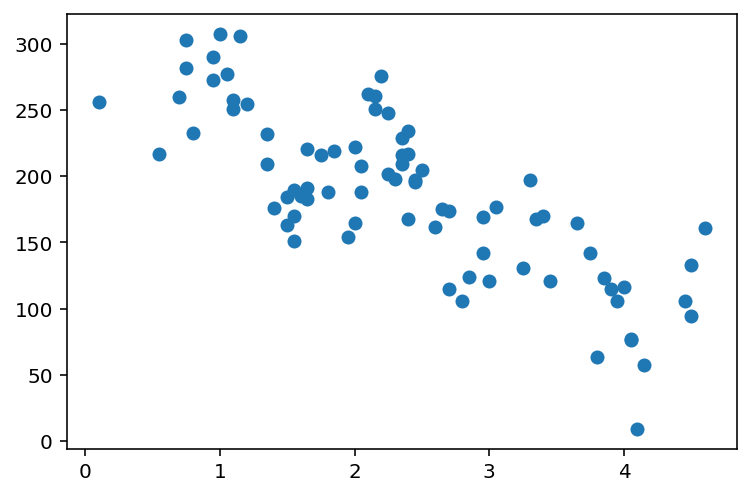

In [6]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

- 상관계수 구해보기

In [7]:
import numpy as np

# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])


array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

### 7-3. "모델"을 만든다는 것, 그 의미 이해하기

In [9]:
x = macbook['used_years'].values
y = macbook['price'].values

print("Job done")

Job done


In [10]:
def model(x,w,b):
    y = w*x + b
    return y
print("Job done")

Job done


In [11]:
model(x=5, w=2, b=2)

12

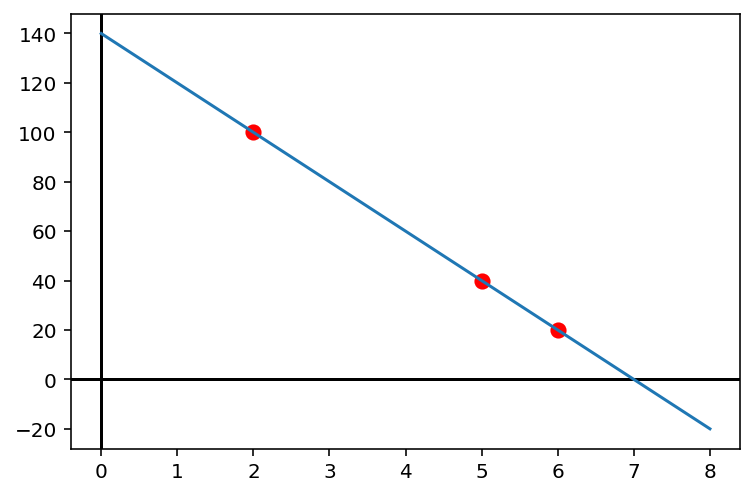

In [18]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

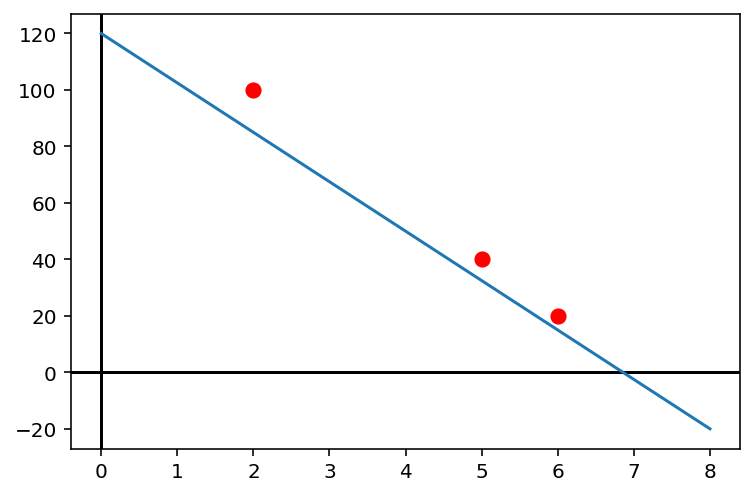

In [27]:
## test

# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(1, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

In [31]:
y

array([120. , 102.5,  85. ,  67.5,  50. ,  32.5,  15. ,  -2.5, -20. ])

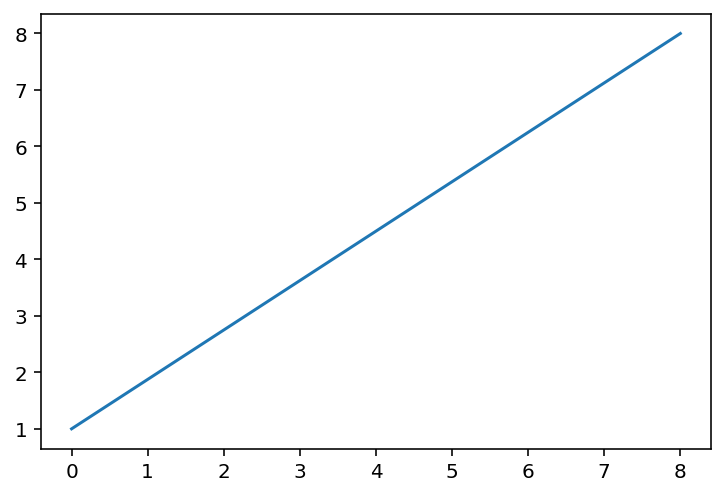

In [28]:
# test
plt.plot(x)

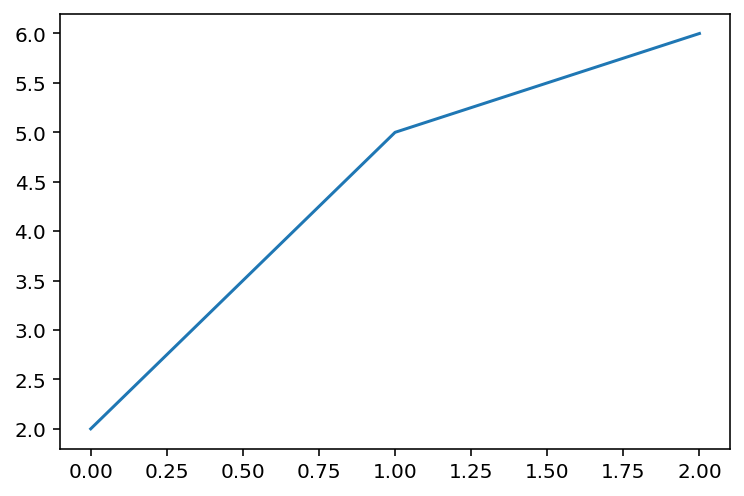

In [29]:
# test
plt.plot(x_data)

----------------------------------------------------------------------

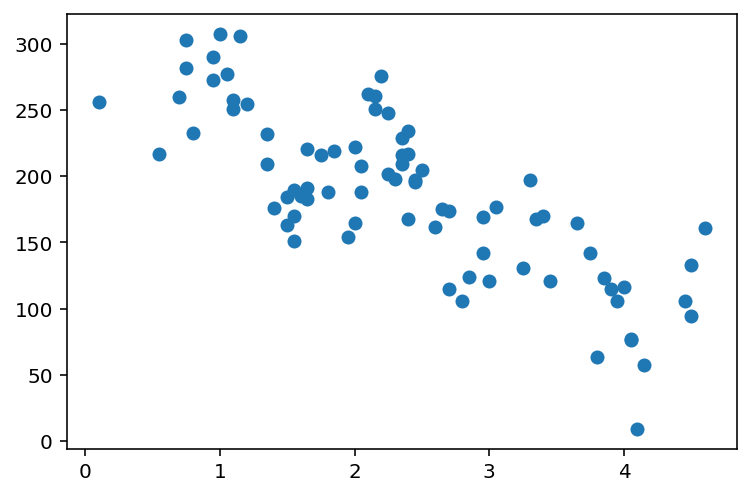

In [30]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

### 7-4. 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기

In [32]:
w = 3.1
b = 2.3
print("슝=3")

슝=3


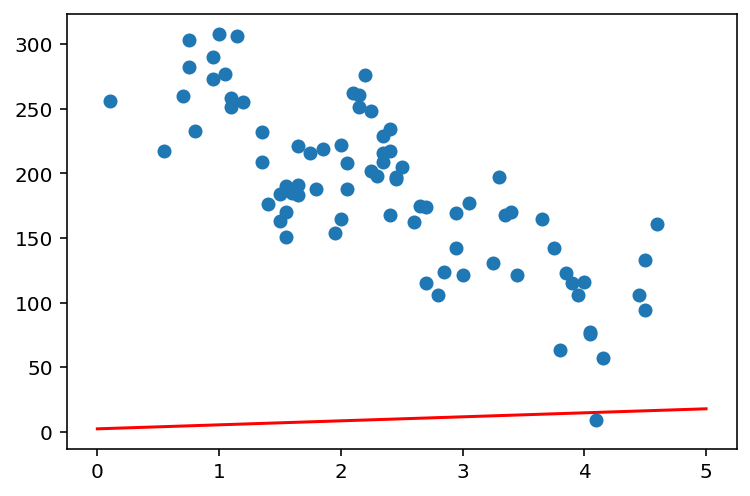

In [33]:
# 위의 w, b를 랜덤으로 지정했을 때 function의 그래프를 그려보기

x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [34]:
# 실제 데이터와 얼마나 차이나는지 확인하기

x = macbook["used_years"].values
x

array([2.65, 3.8 , 0.95, 4.5 , 4.45, 2.7 , 3.05, 2.25, 2.3 , 1.85, 1.5 ,
       0.95, 2.6 , 0.55, 2.05, 0.75, 3.95, 2.8 , 2.05, 1.15, 1.35, 3.35,
       1.35, 2.45, 2.4 , 0.1 , 3.45, 2.35, 0.7 , 1.05, 1.75, 4.1 , 4.5 ,
       4.  , 2.  , 2.45, 2.5 , 2.1 , 3.  , 4.05, 2.7 , 2.15, 3.3 , 2.4 ,
       2.85, 1.65, 1.55, 2.15, 3.4 , 1.55, 0.8 , 2.95, 2.4 , 1.4 , 1.65,
       2.25, 3.85, 3.9 , 4.6 , 2.35, 4.05, 1.2 , 1.95, 1.6 , 2.  , 1.8 ,
       3.75, 3.65, 2.35, 2.2 , 1.  , 4.15, 1.1 , 1.55, 2.95, 1.5 , 1.65,
       1.1 , 3.25, 0.75])

In [35]:
# 현재 모델에 넣어보기

prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [36]:
# macbook 데이터프레임에 prediction 컬럼을 넣어서 비교해보기
macbook['prediction'] = prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [37]:
# 정답과 예측 간 차이 컬럼 만들기

macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


#### RMSE를 구하는 function 만들기

In [38]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse
print("슝=3")

슝=3


In [39]:
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


In [40]:
rmse = RMSE(predictions, y)
rmse

188.81322969819274

#### 손실함수 정의하기

In [41]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L
print("슝=3")

슝=3


#### 미분으로 손실함수값을 줄이는 function 만들기
- dw, db는 loss 값이 최소가 되는 w, b의 기울기값

In [42]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db
print("슝=3")

슝=3


### 7-6. 한 번에 못해도 괜찮아, 한 단계 한 단계 학습해나가면 되니까!

- 하이퍼파라미터

In [43]:
# 매개변수의 기울기 앞에 놓일 상수항을 그냥 정해보기

LEARNING_RATE = 1
print("슝=3")

슝=3


### 학습시키기

1. 입력 데이터 x와 정답 데이터 y 준비
2. 초기 w, b를 랜덤하게 선택
3. 현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y 값을 비교해서 손실함수값 계산
4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산
5. 계산된 gradient를 활용해서 w'=w-ηg, b′=b−ηg 로 업데이트
6. 3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복

In [45]:
# 실험값을 저장할 컨테이너

losses = []
print("슝=3")

슝=3


In [47]:
for i in range(1, 3001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 38.3037
Iteration 200 : Loss 38.3037
Iteration 300 : Loss 38.3036
Iteration 400 : Loss 38.3036
Iteration 500 : Loss 38.3036
Iteration 600 : Loss 38.3036
Iteration 700 : Loss 38.3036
Iteration 800 : Loss 38.3036
Iteration 900 : Loss 38.3036
Iteration 1000 : Loss 38.3036
Iteration 1100 : Loss 38.3036
Iteration 1200 : Loss 38.3036
Iteration 1300 : Loss 38.3036
Iteration 1400 : Loss 38.3036
Iteration 1500 : Loss 38.3036
Iteration 1600 : Loss 38.3036
Iteration 1700 : Loss 38.3036
Iteration 1800 : Loss 38.3036
Iteration 1900 : Loss 38.3036
Iteration 2000 : Loss 38.3036
Iteration 2100 : Loss 38.3036
Iteration 2200 : Loss 38.3036
Iteration 2300 : Loss 38.3036
Iteration 2400 : Loss 38.3036
Iteration 2500 : Loss 38.3036
Iteration 2600 : Loss 38.3036
Iteration 2700 : Loss 38.3036
Iteration 2800 : Loss 38.3036
Iteration 2900 : Loss 38.3036
Iteration 3000 : Loss 38.3036


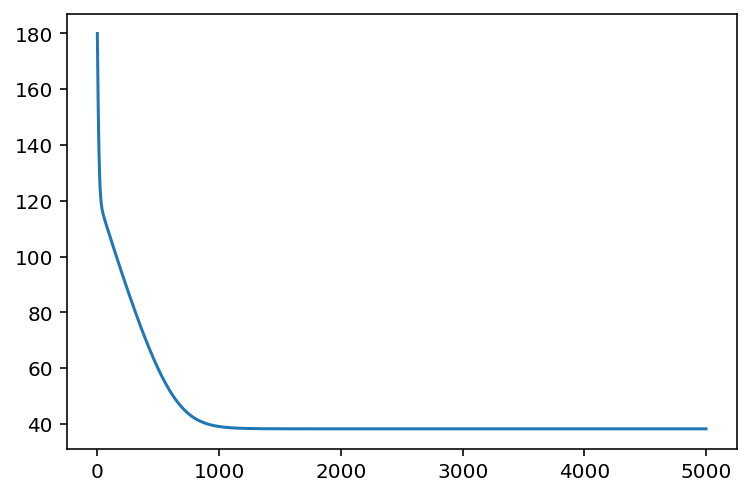

In [48]:
plt.plot(losses)
plt.show()

In [49]:
w, b

(-45.04142321365011, 293.4010665659575)

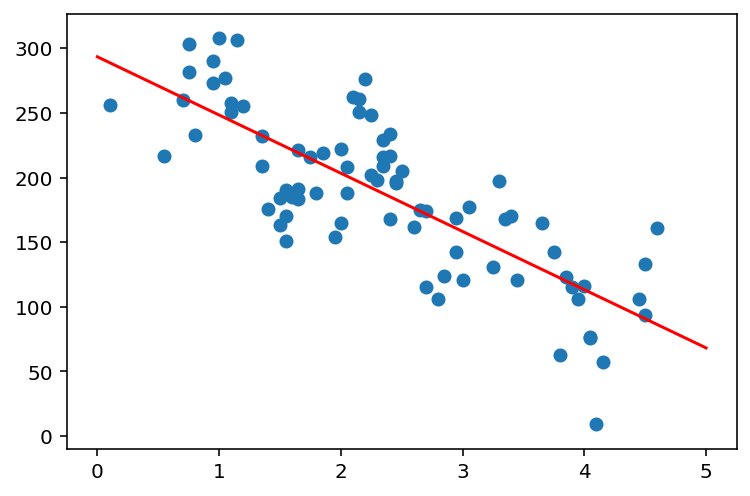

In [50]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

#### 새로운 데이터를 모델에 넣어보기

In [54]:
test = pd.read_csv("macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [55]:
test_x = test['used_years'].values
test_y = test['price'].values

In [56]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.351359
1,1.85,206,210.074434
2,2.40,191,185.301651
3,2.85,164,165.033010
4,3.05,176,156.024726
5,3.35,136,142.512299
6,2.55,133,178.545437
7,2.60,181,176.293366
8,2.50,181,180.797509
9,3.10,86,153.772655


In [57]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.351359,-36.351359
1,1.85,206,210.074434,-4.074434
2,2.40,191,185.301651,5.698349
3,2.85,164,165.033010,-1.033010
4,3.05,176,156.024726,19.975274
5,3.35,136,142.512299,-6.512299
6,2.55,133,178.545437,-45.545437
7,2.60,181,176.293366,4.706634
8,2.50,181,180.797509,0.202491
9,3.10,86,153.772655,-67.772655


In [58]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

45.06326393703716

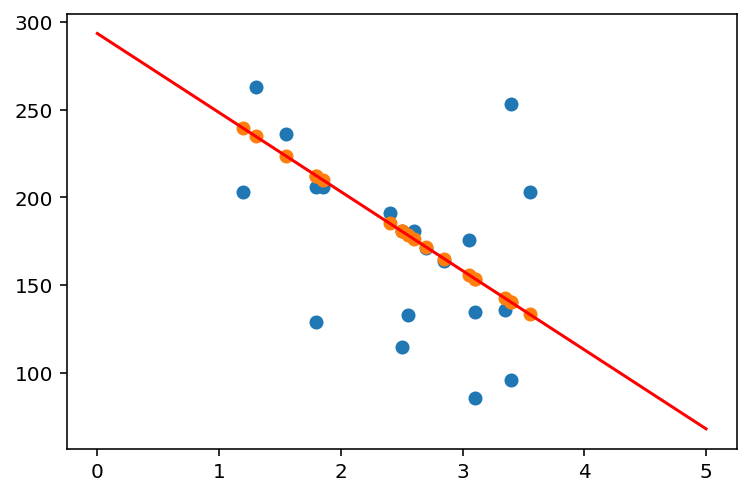

In [68]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

20